**Answer with the type of stats test you would use (assume normal distribution)**

A. Is there a relationship between the length of your arm and the length of your foot?
Pearson's R / Spearmans

B. Do guys and gals quit their jobs at the same rate? independent t-test (2-tailed)


C. Does the length of time of the lecture correlate with a students (numeric) grade? Pearson's R or Spearmans

**Use the telco_churn data.**

A. Does tenure correlate with monthly charges?

B. Total charges?

C. What happens if you control for phone and internet service?

In [4]:
import env
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_columns = None


In [2]:
def get_db_url(username, password, host, db):
    return f'mysql+pymysql://{username}:{password}@{host}/{db}'

url = get_db_url(env.username, env.password, env.host, db='telco_churn')

In [8]:
query = 'SELECT * FROM customers'

df = pd.read_sql(query, url)

Does tenure correlate with monthly charges?

1. state our hypothesis, set our alpha value. 
2. select the data
3. plot the data
4. test for assumptions (normal distribution for correlation)
5. run test
6. draw conclusions

Hypothesis:

H_0: there is no linear correlation between tenure and monthly charges.
H_a: there is a linear correlation between tenure and monthly charges. 

<AxesSubplot:xlabel='tenure', ylabel='monthly_charges'>

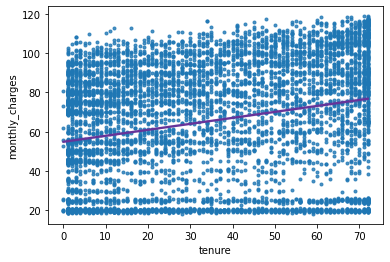

In [17]:
# select the data
charges_df = df[['monthly_charges', 'tenure']]

# plot the data
sns.regplot(x='tenure', y='monthly_charges', 
            data=charges_df, marker='.', 
            line_kws={'color': 'rebeccapurple'})

<AxesSubplot:>

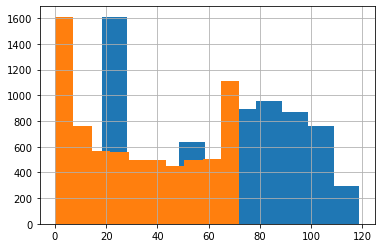

In [18]:
# distributions of the data to check for normalcy
charges_df.monthly_charges.hist()
charges_df.tenure.hist()

These distributions are not normal, so we will use a Spearmans test. 

In [43]:
alpha = 0.05
r, p = stats.spearmanr(charges_df.tenure, charges_df.monthly_charges)

def eval_result(alpha, p):
    if p < alpha:
        return print(f'Reject the null hypothesis. There is a linear correlation (p-value: {p})')
    else:
        return print(f'We fail to reject the null hypothesis that there is a linear correlation (p-value: {p})')

In [44]:
eval_result(alpha, p)

r

Reject the null hypothesis. There is a linear correlation (p-value: 1.0271266876409408e-123)


0.27641678933130215

**Takeaways**

There is a correlation between monthly charges and tenure. 
With an r of .28, we can say the correlation is "weak-moderate"
__________________

B. Does tenure correlate with total charges?

1. state our hypothesis, set our alpha value. 
2. select the data, run a .info()
3. plot the data
4. test for assumptions (normal distribution for correlation)
5. run test
6. draw conclusions

Hypothesis: 
- H_0: There is no linear correlation between tenure and total charges.

- H_a: There is a linear correlation between tenure and total charges. 

In [35]:
alpha = 0.05

# select the data
ttl_charges_df = df[['tenure', 'total_charges']]

# look at a summary of the dataframe
# ttl_charges_df.info()

# try to find the data errors
ttl_charges_df.total_charges.sort_values()

# convert the empty space to '0'
ttl_charges_df['total_charges'] = ttl_charges_df['total_charges'].str.replace(' ', '0').astype('float')

# confirm our datatypes
ttl_charges_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tenure         7043 non-null   int64  
 1   total_charges  7043 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 110.2 KB


<ipython-input-35-8cceec386517>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ttl_charges_df['total_charges'] = ttl_charges_df['total_charges'].str.replace(' ', '0').astype('float')


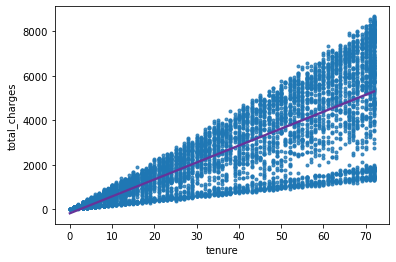

In [37]:
# plot the data
sns.regplot(x = 'tenure', y='total_charges', 
            data = ttl_charges_df, 
            marker='.', line_kws={'color': 'rebeccapurple'})
plt.show()

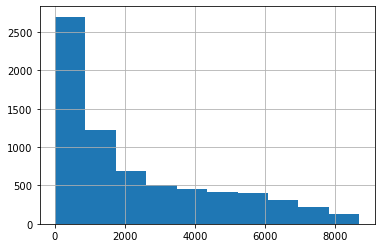

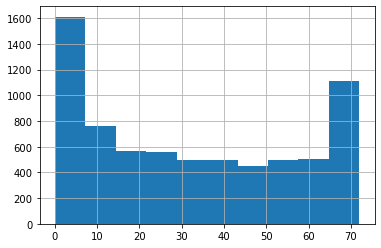

In [39]:
# check assumptions
ttl_charges_df.total_charges.hist()
plt.show()
ttl_charges_df.tenure.hist()
plt.show()

Because these are not normally distributed, we will use a spearman's test. 

In [42]:
# run our test
r, p = stats.spearmanr(ttl_charges_df.tenure, ttl_charges_df.total_charges)

eval_result(alpha, p)

r

Reject the null hypothesis. There is a linear correlation (p-value: 0.0)


0.8896957900597577

**takeaway**

There is a linear correlation between tenure and total charges. 

With an r of .89, the correlation is strong. 

C. What happens if you control for phone and internet service?

Let's look at customers who have phone service and no internet. 

1. state our hypothesis, set our alpha value.
1. select the data, run a .info()
1. plot the data
1. test for assumptions (normal distribution for correlation)
1. run test
1. draw conclusions

Of customers who have only phone service:
H_0: there is no linear correlation between tenure and monthly charges. 
H_a: there is a linear correlation between tenure and monthly charges. 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1739 entries, 0 to 7041
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tenure           1739 non-null   int64  
 1   monthly_charges  1739 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 40.8 KB


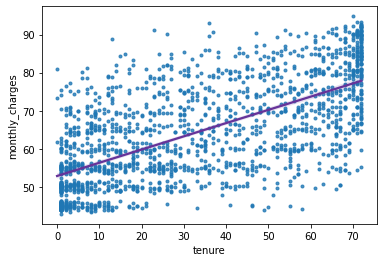

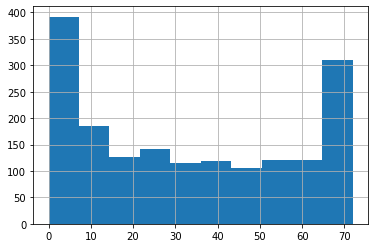

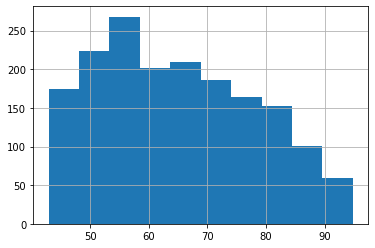

In [49]:
# set alpha
alpha = 0.05

# select the data
phone_df = df[(df.phone_service == 'Yes') & (df.internet_service_type_id == 1)][['tenure', 'monthly_charges']]

# look at info
phone_df.info()

# plot the data
sns.regplot(x='tenure', y='monthly_charges', data=phone_df, marker='.', 
            line_kws=({'color': 'rebeccapurple'}))
plt.show()

# check for normal distribution

phone_df.tenure.hist()
plt.show()

phone_df.monthly_charges.hist()
plt.show()

We will use Spearmans test due to violation of assumption of normality. 

In [50]:
r, p = stats.spearmanr(phone_df.tenure, phone_df.monthly_charges)

eval_result(alpha, p)

print(f'r value = {r}')

Reject the null hypothesis. There is a linear correlation (p-value: 5.423601644635052e-222)
r value = 0.6644708508462759


**takeaways**

There is a moderate-strong correlation betwen tenure and monthly charges for customers who have only phone service. 

**Use the employees database.**

A. Is there a relationship between how long an employee has been with the company and their salary?

B. Is there a relationship between how long an employee has been with the company and the number of titles they have had?

In [51]:
url = get_db_url(env.username, env.password, env.host, db='employees')

query = '''
SELECT * 
FROM employees
JOIN salaries USING (emp_no)
WHERE to_date = '9999-01-01';
'''

df = pd.read_sql(query, url)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240124 entries, 0 to 240123
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   emp_no      240124 non-null  int64 
 1   birth_date  240124 non-null  object
 2   first_name  240124 non-null  object
 3   last_name   240124 non-null  object
 4   gender      240124 non-null  object
 5   hire_date   240124 non-null  object
 6   salary      240124 non-null  int64 
 7   from_date   240124 non-null  object
 8   to_date     240124 non-null  object
dtypes: int64(2), object(7)
memory usage: 16.5+ MB


1. state our hypothesis, set our alpha value.
1. select the data, run a .info()
1. plot the data
1. test for assumptions (normal distribution for correlation)
1. run test
1. draw conclusions

Is there a relationship between an employee's tenure and their salary?

H_0: there is no linear correlation between employee tenure and salary. 

H_a: there is a linear correlation between employee tenure and salary. 

<AxesSubplot:xlabel='tenure', ylabel='salary'>

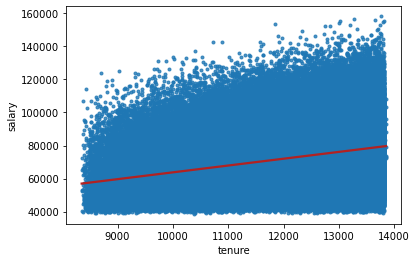

In [60]:
alpha = 0.05

# select our data, calculate tenure
df['tenure'] = pd.to_datetime("today") - pd.to_datetime(df.hire_date)

df['tenure'] = df.tenure.astype('str').str.split(' ', expand=True)[0].astype('int')

# df.info()
tenure_df = df[['tenure', 'salary']]

# plot the data
sns.regplot(x='tenure', y='salary', 
            data=tenure_df, marker='.', 
            line_kws=({'color': 'firebrick'}))

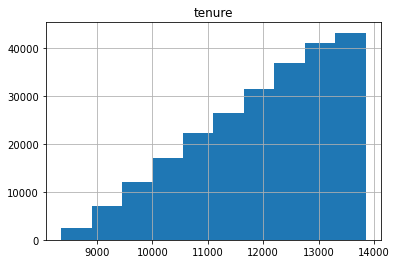

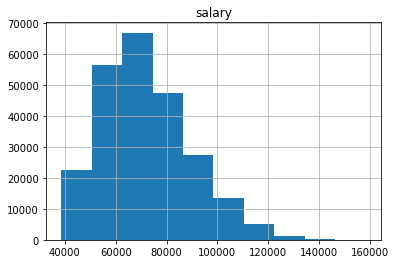

In [63]:
# look at the distribution, look for normality

tenure_df.tenure.hist()
plt.title('tenure')
plt.show()
tenure_df.salary.hist()
plt.title('salary')
plt.show()

Distributions are not normal, so we will use spearmans test. 

In [65]:
# run the test
r, p = stats.spearmanr(tenure_df.tenure, tenure_df.salary)

# evaluate results
eval_result(alpha, p)

print('r value: ', r)

Reject the null hypothesis. There is a linear correlation (p-value: 0.0)
r value:  0.3128783525010577


**takeaways**

There is a moderate correlation between tenure and salary. 

Is there a relationship between employee tenure and the number of titles they have had? 

1. state our hypothesis, set our alpha value.
1. select the data, run a .info()
1. plot the data
1. test for assumptions (normal distribution for correlation)
1. run test
1. draw conclusions

- H_0: there is no linear correlation between tenure and number of titles. 
- H_a: there is a linear correalation between tenure and number of titles. 


In [ ]:
alpha = 0.05

# select the data
url = get_db_url(env.username, env.password, env.host, db='employees')

query = '''
select t.emp_no, count(t.title) as num_titles, te.tenure
from titles t
join (select emp_no, datediff(now(), min(from_date)) AS tenure
from titles
group by emp_no
having max(to_date) = '9999-01-01'
) te using (emp_no)
group by t.emp_no;
'''

df = pd.read_sql(query, url)
df.info()

<AxesSubplot:xlabel='tenure', ylabel='num_titles'>

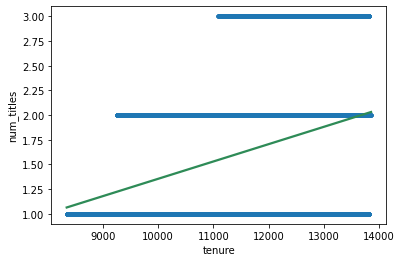

In [68]:
df = df[['num_titles', 'tenure']]

# plot the data
sns.regplot(x='tenure', y='num_titles', data=df, marker='.', line_kws=({'color': 'seagreen'}))

Because the number of titles is a discrete value, we should run an ANOVA or a kruskal Wallis test to test whether the average salary of those with 1 title is different from those with 2, or 2 different from 3, etc. 

Assumptions: 
- do they have equal variance? 
- are there enough observations? YES
- are they independent of each other? YES

In [69]:
# observatations:
df.num_titles.value_counts()

2    125345
1    111892
3      2887
Name: num_titles, dtype: int64

In [71]:
# equal variance?
# h_o the variance is equal
# h_a the variances are significantly different
stats.levene(df.num_titles, df.tenure)

LeveneResult(statistic=718602.1569097865, pvalue=0.0)

The variances are significantly different; therefore we will use the Kruskal Wallis test. 

In [72]:
stats.kruskal(df.num_titles, df.tenure)

KruskalResult(statistic=371488.64419334417, pvalue=0.0)

**takeaway**

There is a difference in tenure and number of titles an employee has held. 

**Use the sleepstudy data.**

A. Is there a relationship between days and reaction time?

In [73]:
from pydataset import data
df = data('sleepstudy')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 1 to 180
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Reaction  180 non-null    float64
 1   Days      180 non-null    int64  
 2   Subject   180 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 5.6 KB


,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308


- H_0: there is no linear correlation between days and reaction time
- H_a: there is a linear correlation between days and reaction time



<AxesSubplot:xlabel='Days', ylabel='Reaction'>

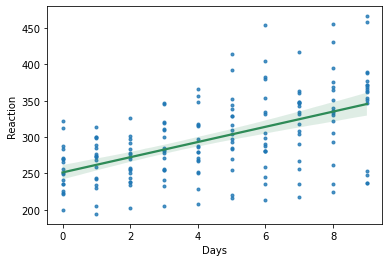

In [74]:
alpha = 0.05

# select the data
df = df[['Reaction', 'Days']]

# plot the data
sns.regplot(x='Days', y='Reaction', data=df, marker='.', line_kws=({'color':'seagreen'}))

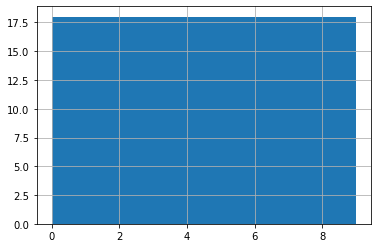

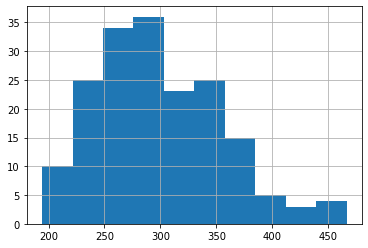

In [75]:
# check for normal distribution, plot histograms
df.Days.hist()
plt.show()

df.Reaction.hist()
plt.show()

Days is uniformly distributed, and reaction time is normally distributed. 

In [76]:
# run the spearman test
r, p = stats.spearmanr(df.Days, df.Reaction)
eval_result(alpha, p)
print('r value: ', r)

Reject the null hypothesis. There is a linear correlation (p-value: 5.132878057706873e-14)
r value:  0.5228138502259547


**Takeaway**
There is a moderate correlation between days and reaction time. 